In [12]:
import sys
import numpy as np
import pickle as pk
sys.path.append('/home/igudich/work/mantid-benchmarks/python/')
import dictionary_tree as tree
import copy

In [9]:
# load structure from pickle file
with open('/media/igudich/2ecb279f-1d34-4ab5-8a8a-224220f5d50f/SNSReductionFiles/res_20.pickle', 'rb') as f:
        results = pk.load(f)
# get data for file factor 20
factor = 20
dctDctTree = copy.deepcopy(results[factor])
for key, val in dctDctTree.items():
    val = tree.extractChilds(val)

In [10]:
# sorted by execution time dict of algorithms
threads_num = 12
lst = tree.listWidthOrder(tree.extractChilds(dctDctTree[threads_num]))
dct = {}
for it in lst:
    dct.update({it[1][0] : it[0]})
dct

{-100.37193298339844: 'root',
 3.719699816429056e-05: 'MaskInstrument12',
 3.967099837609567e-05: 'MaskInstrument59',
 6.370600021909922e-05: 'DetermineChunking29',
 6.599199696211144e-05: 'DetermineChunking37',
 7.987998833414167e-05: 'RenameWorkspace25',
 9.616299212211743e-05: 'DeleteWorkspace43',
 0.0001267970073968172: 'RenameWorkspace42',
 0.0001439339976059273: 'RenameWorkspace35',
 0.00017289299285039306: 'RenameWorkspace24',
 0.00021911402291152626: 'ConvertUnits76',
 0.0002851189929060638: 'SortEvents19',
 0.0002987610059790313: 'SetSampleMaterial46',
 0.0003461830201558769: 'GeneratePythonScript81',
 0.00042772298911586404: 'PDLoadCharacterizations2',
 0.0005039670504629612: 'SortEvents66',
 0.0005548500339500606: 'PDDetermineCharacterizations41',
 0.002265737857669592: 'ClearMaskedSpectra13',
 0.00247598416171968: 'ClearMaskedSpectra60',
 0.002972853137180209: 'CompressEvents40',
 0.003213919000700116: 'PDDetermineCharacterizations27',
 0.004455217160284519: 'SetUncertainti

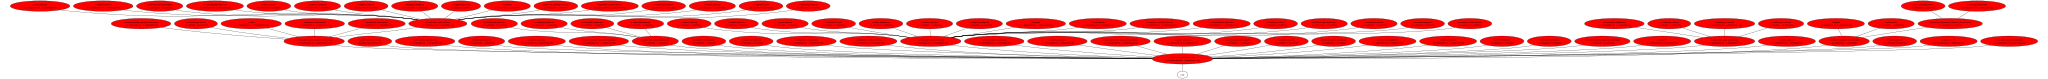

In [14]:
# create lenear model for time against number of threads, red color -> scalability < 0.3
tree.toDot(tree.fitModel(dctDctTree, lambda x, y: np.polyfit(x, y, 1)), lambda x: x[0] > -0.3)